In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

df_criticas = pd.read_csv("./train.csv",encoding='utf-8')
df = df_criticas.copy()
df.head(10)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
5,5,Probablemente mi película favorita de todos lo...,positivo
6,6,Seguro que me gustaría ver una resurrección de...,positivo
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo
8,8,Alentados por los comentarios positivos sobre ...,negativo
9,9,"Si te gusta la risa original desgarradora, te ...",positivo


Text(0.5, 1.0, 'Porcentaje en sentimiento')

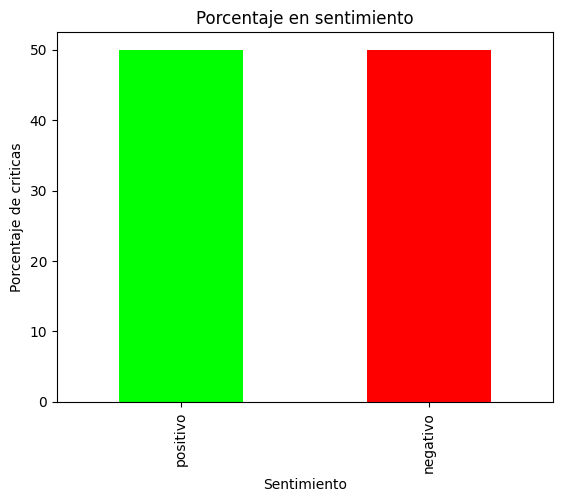

In [2]:
df_porcentaje = df['sentimiento'].value_counts(normalize=True)*100

df_porcentaje.plot(kind='bar',color=[(0,1,0),(1,0,0)])
plt.ylabel("Porcentaje de criticas")
plt.xlabel("Sentimiento")
plt.title("Porcentaje en sentimiento")

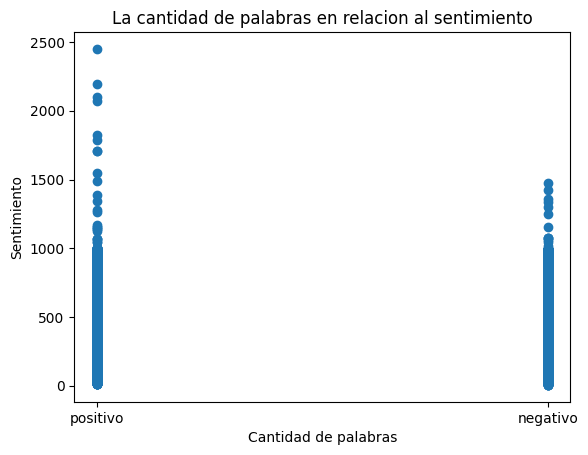

In [3]:
df['num_palabras'] = df['review_es'].str.split().apply(len)
plt.scatter(df['sentimiento'], df['num_palabras'])
plt.xlabel('Cantidad de palabras')
plt.ylabel('Sentimiento')
plt.title('La cantidad de palabras en relacion al sentimiento')
plt.show()

In [4]:
vectorizer = CountVectorizer(min_df=0.1, max_df=0.7,token_pattern=r'\b(?:[^\d\W_])+\b')
X = vectorizer.fit_transform(df['review_es'])
palabras = vectorizer.get_feature_names_out()
print(palabras)
print(len(palabras))
print(X.toarray())

['actores' 'actuación' 'ahora' 'al' 'algo' 'alguien' 'algunas' 'algunos'
 'antes' 'aquí' 'así' 'aunque' 'años' 'aún' 'bastante' 'bien' 'buen'
 'buena' 'bueno' 'cada' 'casi' 'cine' 'como' 'con' 'cosas' 'creo'
 'cualquier' 'cuando' 'cómo' 'debe' 'decir' 'del' 'demasiado' 'desde'
 'después' 'director' 'donde' 'dos' 'durante' 'e' 'ella' 'ellos' 'embargo'
 'entonces' 'entre' 'era' 'esa' 'escena' 'escenas' 'ese' 'eso' 'estaba'
 'este' 'esto' 'estoy' 'está' 'están' 'final' 'forma' 'fue' 'fuera' 'gran'
 'ha' 'haber' 'había' 'hace' 'hacer' 'han' 'hasta' 'hay' 'he' 'hecho'
 'historia' 'hizo' 'hombre' 'incluso' 'le' 'luego' 'lugar' 'mal' 'manera'
 'mayoría' 'me' 'mejor' 'mejores' 'menos' 'mi' 'mientras' 'minutos'
 'mismo' 'momento' 'muchas' 'mucho' 'muchos' 'muy' 'más' 'nada' 'ni'
 'nunca' 'o' 'otra' 'otro' 'otros' 'parece' 'parte' 'películas' 'pero'
 'personaje' 'personajes' 'personas' 'poco' 'podría' 'porque' 'primera'
 'puede' 'puedo' 'qué' 'real' 'realidad' 'realmente' 'sea' 'ser' 'si'
 'sido

In [5]:
for i, palabra in enumerate(palabras):
    df[palabra] = X.toarray()[:, i]

df.head(10)

C:\Users\LUCAS\AppData\Local\Temp\ipykernel_1032\2652835665.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[palabra] = X.toarray()[:, i]
C:\Users\LUCAS\AppData\Local\Temp\ipykernel_1032\2652835665.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[palabra] = X.toarray()[:, i]
C:\Users\LUCAS\AppData\Local\Temp\ipykernel_1032\2652835665.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

,ID,review_es,sentimiento,num_palabras,actores,actuación,ahora,al,algo,alguien,...,través,uno,veces,ver,vez,vi,vida,visto,ya,él
0,0,Uno de los otros críticos ha mencionado que de...,positivo,345,0,0,0,2,0,0,...,0,1,0,1,0,0,0,1,2,1
1,1,Una pequeña pequeña producción.La técnica de f...,positivo,161,1,0,0,0,0,0,...,0,1,2,1,0,0,1,0,0,0
2,2,Pensé que esta era una manera maravillosa de p...,positivo,173,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,"Básicamente, hay una familia donde un niño peq...",negativo,137,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,237,0,1,0,0,0,0,...,0,2,0,2,0,0,1,0,1,0
5,5,Probablemente mi película favorita de todos lo...,positivo,123,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
6,6,Seguro que me gustaría ver una resurrección de...,positivo,157,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo,168,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,8,Alentados por los comentarios positivos sobre ...,negativo,120,0,1,0,1,0,0,...,0,2,1,2,1,0,0,1,0,0
9,9,"Si te gusta la risa original desgarradora, te ...",positivo,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Random Forest

In [6]:
df.drop(columns='ID',inplace=True)
df.drop(columns='review_es',inplace=True)

ds_x=df.drop(['sentimiento'], axis='columns', inplace=False)
ds_y = df['sentimiento'].copy()

x_train, x_test, y_train, y_test = train_test_split(ds_x,
                                                    ds_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=4, #semilla
                                                    stratify=df["sentimiento"].values)

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

rf = RandomForestClassifier()
param_dist = {
    'n_estimators': list(range(200,500)),
    'max_depth': list(range(20, 100)),
    'min_samples_split': list(range(20, 100)),
    'min_samples_leaf': list(range(20, 100))
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring= make_scorer(f1_score),
    cv=5,
    random_state=42
)

random_search.fit(x_train,y_train)


c:\Users\LUCAS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\LUCAS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\LUCAS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "c:\Users\LUCAS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Users\LUCAS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "c:\Users

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [20, 21, 22, 23, 24, 25,
                                                      26, 27, 28, 29, 30, 31,
                                                      32, 33, 34, 35, 36, 37,
                                                      38, 39, 40, 41, 42, 43,
                                                      44, 45, 46, 47, 48, 49, ...],
                                        'min_samples_leaf': [20, 21, 22, 23, 24,
                                                             25, 26, 27, 28, 29,
                                                             30, 31, 32, 33, 34,
                                                             35, 36, 37, 38, 39,
                                                             40, 41, 42, 43, 44,
                                                             45, 46, 47, 48, 49, ...],
                                        'min_samples_split': [20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, 31,
                                                              32, 33, 34, 35,
                                                              36, 37, 38, 39,
                                                              40, 41, 42, 43,
                                                              44, 45, 46, 47,
                                                              48, 49, ...],
                                        'n_estimators': [200, 201, 202, 203,
                                                         204, 205, 206, 207,
                                                         208, 209, 210, 211,
                                                         212, 213, 214, 215,
                                                         216, 217, 218, 219,
                                                         220, 221, 222, 223,
                                                         224, 225, 226, 227,
                                                         228, 229, ...]},
                   random_state=42, scoring=make_scorer(f1_score))

In [8]:
random_search.best_params_

{'n_estimators': 336,
 'min_samples_split': 83,
 'min_samples_leaf': 64,
 'max_depth': 49}

In [9]:
random_forest =  rf.set_params(**random_search.best_params_)
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=49, min_samples_leaf=64, min_samples_split=83,
                       n_estimators=336)

F1 Score: 0.7063790487499175
Accuracy Score: 0.7032666666666667
Recall Score: 0.7138666666666666
Precision Score: 0.6990468729599164


Text(50.722222222222214, 0.5, 'True')

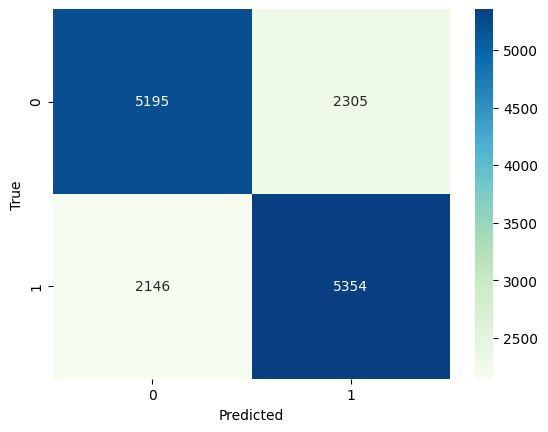

In [10]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import seaborn as sns

y_pred = random_forest.predict(x_test)

print(f"F1 Score: {f1_score(y_test,y_pred, pos_label= 'positivo')}")
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {recall_score(y_test,y_pred, pos_label='positivo')}")
print(f"Precision Score: {precision_score(y_test,y_pred, pos_label='positivo')}")

tabla=confusion_matrix(y_test, y_pred)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

{'n_estimators': 295, 'min_samples_split': 91, 'min_samples_leaf': 26 'max_depth': 98}

F1 Score: 0.7140685918192031

Accuracy Score: 0.7115333333333334

Recall Score: 0.7204

Precision Score: 0.7078475042578278

In [11]:
 random_forest = RandomForestClassifier(n_estimators=295, min_samples_split=91,min_samples_leaf=26,max_depth=98)
 random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=98, min_samples_leaf=26, min_samples_split=91,
                       n_estimators=295)

F1 Score: 0.7125041240514681
Accuracy Score: 0.7095333333333333
Recall Score: 0.7198666666666667
Precision Score: 0.7052906596995427


Text(50.722222222222214, 0.5, 'True')

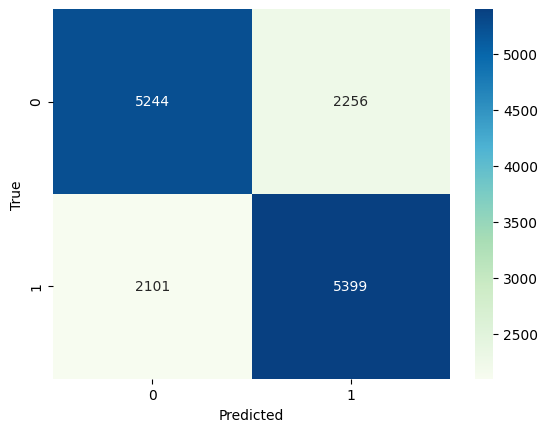

In [12]:
y_pred = random_forest.predict(x_test)

print(f"F1 Score: {f1_score(y_test,y_pred, pos_label= 'positivo')}")
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {recall_score(y_test,y_pred, pos_label='positivo')}")
print(f"Precision Score: {precision_score(y_test,y_pred, pos_label='positivo')}")

tabla=confusion_matrix(y_test, y_pred)
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

## Predict de kaggle

In [47]:
df_criticas_test = pd.read_csv('./test.csv')
df_test = df_criticas_test.copy()
df_test.head(10)

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."
5,60005,La llegada de Rafa a Euskadi es como ponerse a...
6,60006,El nivel del cine y lo peor la capacidad intel...
7,60007,Es triste ver una película como ésta y escucha...
8,60008,Puedo entender que Torrente I y II y Lo imposi...
9,60009,"-Ahivalohostia, Txomin, qué montón de gente ri..."


In [48]:
df_test['num_palabras'] = df_test['review_es'].str.split().apply(len)

vectorizer = CountVectorizer(vocabulary=palabras)
matriz_caracteristicas_test = vectorizer.fit_transform(df_test['review_es'])

for i, palabra in enumerate(palabras):
    df_test[palabra] = matriz_caracteristicas_test.toarray()[:, i]


_df_test = df_test.drop(columns='ID',inplace=False)
_df_test.drop(columns='review_es',inplace=True)

_df_test.head(10)

<ipython-input-48-0e7876017248>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[palabra] = matriz_caracteristicas_test.toarray()[:, i]
<ipython-input-48-0e7876017248>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[palabra] = matriz_caracteristicas_test.toarray()[:, i]
<ipython-input-48-0e7876017248>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

,num_palabras,actores,actuación,ahora,al,algo,alguien,algunas,algunos,antes,...,través,uno,veces,ver,vez,vi,vida,visto,ya,él
0,785,0,0,0,5,0,0,0,0,1,...,0,1,0,2,0,0,1,0,2,1
1,206,1,0,0,0,1,0,1,0,0,...,0,0,1,2,0,0,1,0,0,0
2,132,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,319,0,0,1,5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,290,0,0,1,1,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0
5,403,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
6,102,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,358,0,0,0,2,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
8,166,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,561,1,0,1,1,0,0,0,0,0,...,0,1,0,2,0,0,0,1,2,0


In [49]:
pred_kaggle_rf = random_forest.predict(_df_test)
df_kaggle_rf = pd.DataFrame({'ID': df_test['ID'], 'sentimiento': pred_kaggle_rf})
df_kaggle_rf.head(10)

,ID,sentimiento
0,60000,positivo
1,60001,negativo
2,60002,negativo
3,60003,negativo
4,60004,positivo
5,60005,negativo
6,60006,positivo
7,60007,negativo
8,60008,negativo
9,60009,negativo


In [50]:
df_kaggle_rf.shape[0]

8599

In [51]:
df_kaggle_rf.to_csv('pred_kaggle_ramdom_forest.csv', index=False)

### Guardo el modelo

In [13]:
# Guardar el arbol
import joblib
filename = 'RandomForest.sav'
joblib.dump(random_forest, filename)

['RandomForest.sav']